# Importing Libraries

In [167]:
import numpy as np # linear algebra
import pandas as pd
import random as rd
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly as py
import plotly.graph_objs as go
from sklearn.cluster import KMeans
import warnings
import os
warnings.filterwarnings("ignore")
py.offline.init_notebook_mode(connected = True)

# Data Exploration

In [168]:
df = pd.read_csv('./Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [169]:
df.shape

(200, 5)

In [170]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [171]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [172]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [173]:
X = df.iloc[:,[3,4]].values
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

# Data Visualization

In [174]:
plt.style.use('fivethirtyeight')

# Histograms

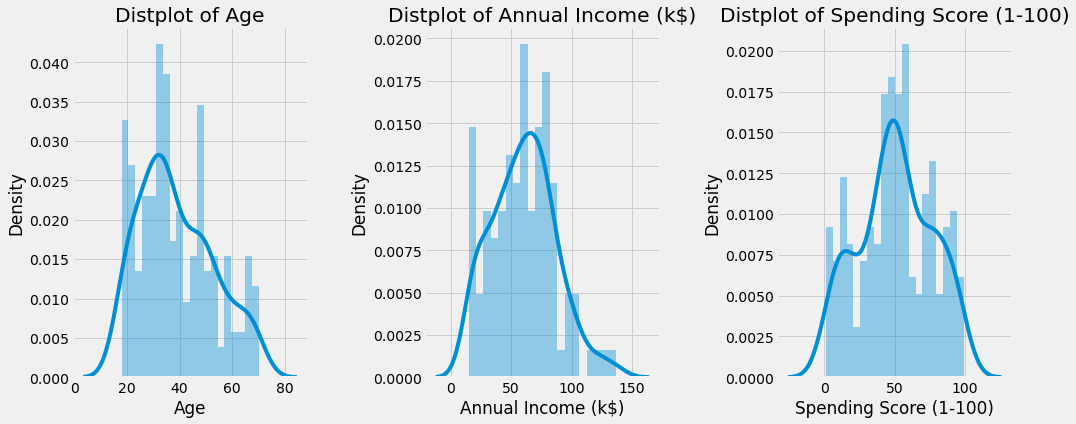

In [175]:
plt.figure(1 , figsize = (15 , 6))
n = 0 
for x in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.distplot(df[x] , bins = 20)
    plt.title('Distplot of {}'.format(x))
plt.show()

# Count Plot of Gender

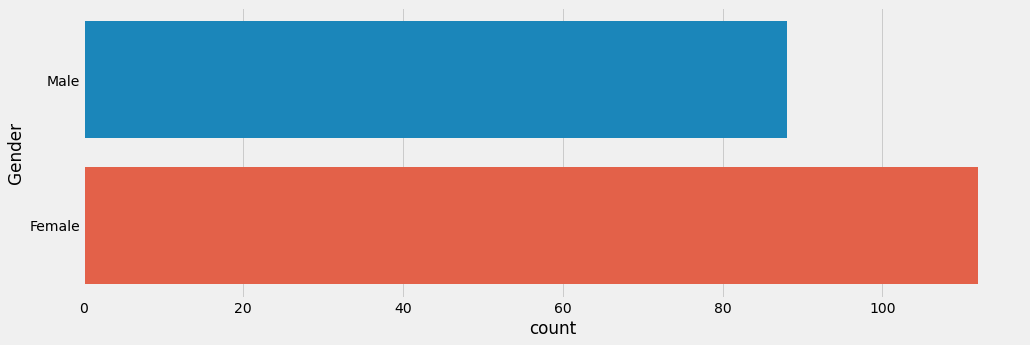

In [176]:
plt.figure(1 , figsize = (15 , 5))
sns.countplot(y = 'Gender' , data = df)
plt.show()

# Ploting the Relation between Age , Annual Income and Spending Score

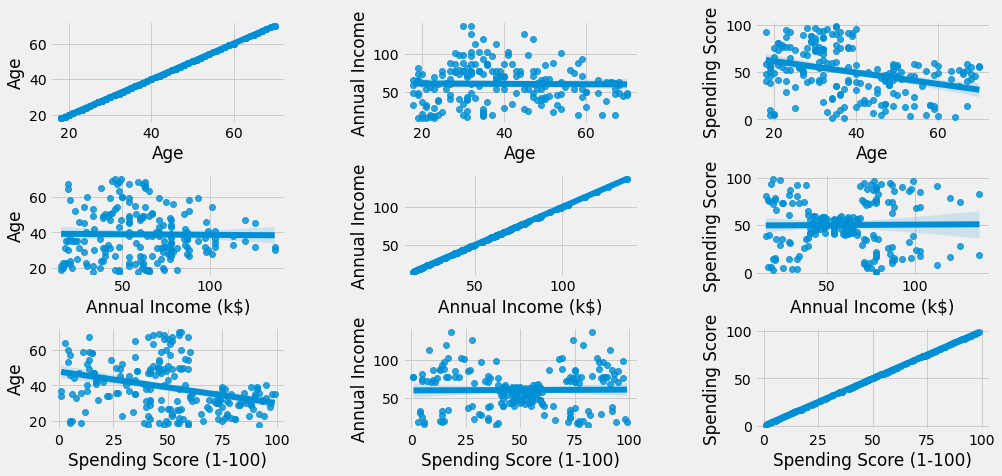

In [177]:
plt.figure(1 , figsize = (15 , 7))
n = 0 
for x in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    for y in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
        n += 1
        plt.subplot(3 , 3 , n)
        plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
        sns.regplot(x = x , y = y , data = df)
        plt.ylabel(y.split()[0]+' '+y.split()[1] if len(y.split()) > 1 else y )
plt.show()

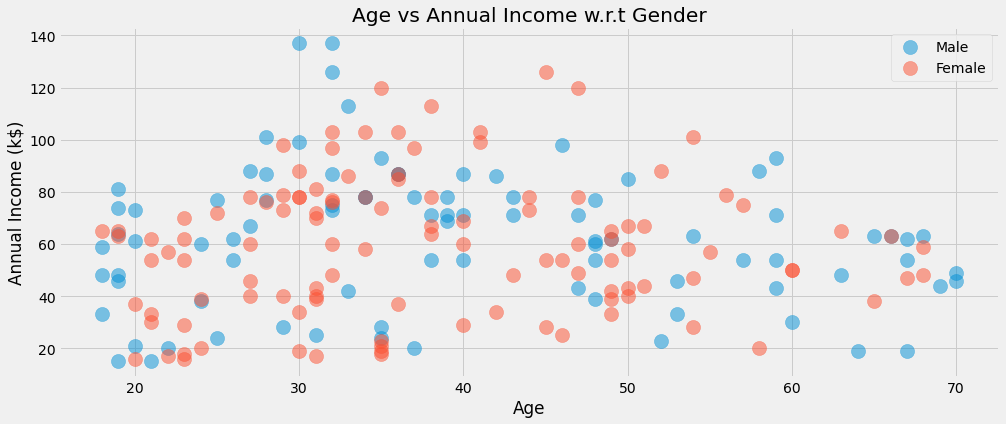

In [178]:
plt.figure(1 , figsize = (15 , 6))
for gender in ['Male' , 'Female']:
    plt.scatter(x = 'Age' , y = 'Annual Income (k$)' , data = df[df['Gender'] == gender] ,
                s = 200 , alpha = 0.5 , label = gender)
plt.xlabel('Age'), plt.ylabel('Annual Income (k$)') 
plt.title('Age vs Annual Income w.r.t Gender')
plt.legend()
plt.show()

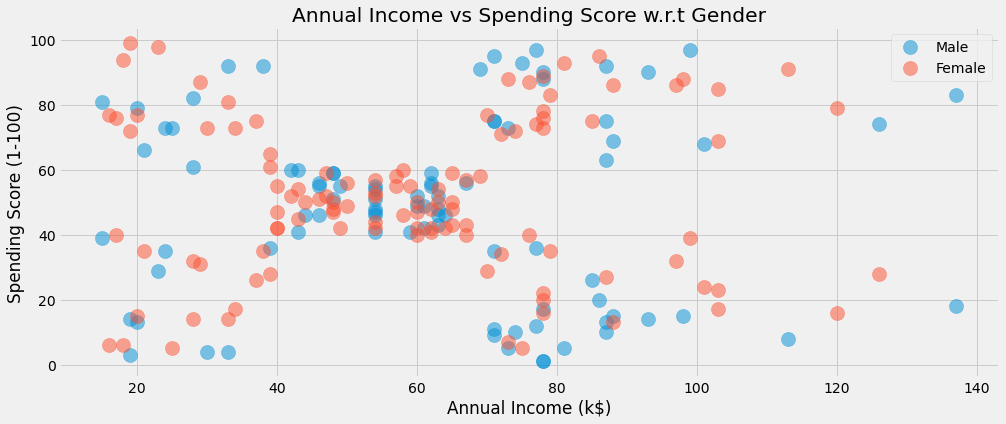

In [179]:
plt.figure(1 , figsize = (15 , 6))
for gender in ['Male' , 'Female']:
    plt.scatter(x = 'Annual Income (k$)',y = 'Spending Score (1-100)' ,
                data = df[df['Gender'] == gender] ,s = 200 , alpha = 0.5 , label = gender)
plt.xlabel('Annual Income (k$)'), plt.ylabel('Spending Score (1-100)') 
plt.title('Annual Income vs Spending Score w.r.t Gender')
plt.legend()
plt.show()

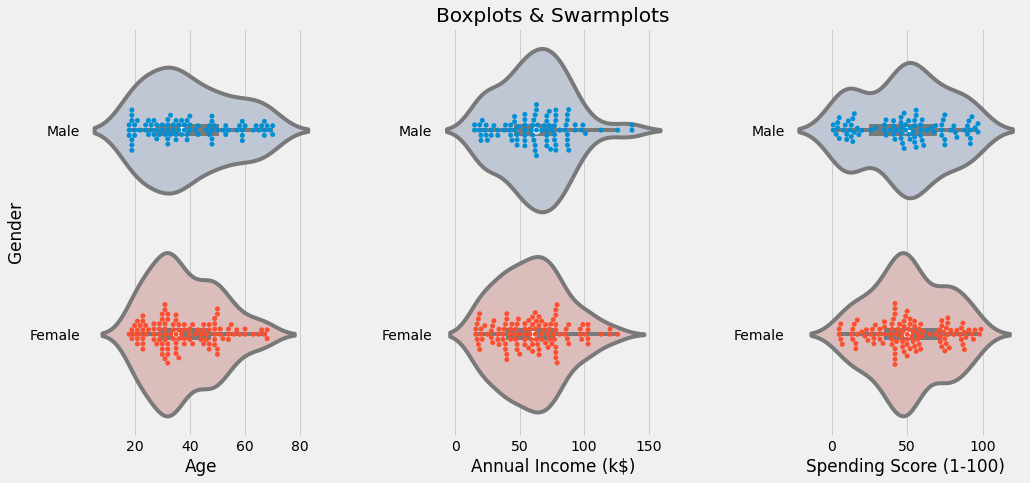

In [180]:
#Distribution of values in Age , Annual Income and Spending Score according to Gender
plt.figure(1 , figsize = (15 , 7))
n = 0 
for cols in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    n += 1 
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.violinplot(x = cols , y = 'Gender' , data = df , palette = 'vlag')
    sns.swarmplot(x = cols , y = 'Gender' , data = df)
    plt.ylabel('Gender' if n == 1 else '')
    plt.title('Boxplots & Swarmplots' if n == 2 else '')
plt.show()

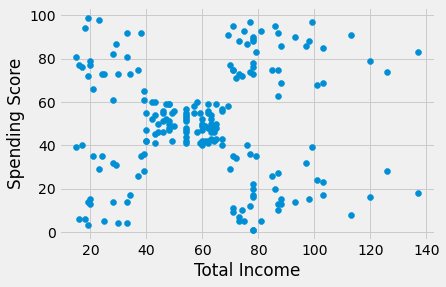

In [181]:
plt.scatter (X[...,0],X[...,1])
plt.xlabel ('Total Income')
plt.ylabel ('Spending Score')
plt.show()

# Dendrogram

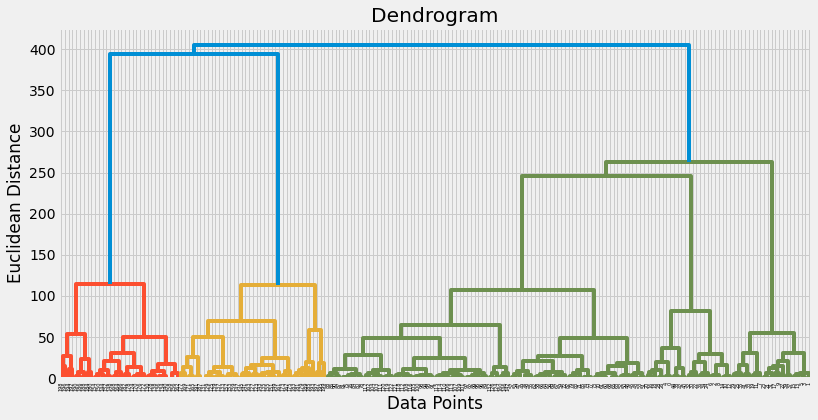

In [183]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage

# Membaca data
df = pd.read_csv('./Mall_Customers.csv')

# Mengambil fitur yang akan digunakan
X = df.iloc[:, [3, 4]].values

# Membuat dendrogram dengan metode linkage 'ward'
linked = linkage(X, method='ward')

# Menampilkan dendrogram
plt.figure(figsize=(12, 6))
dendrogram(linked,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=True)
plt.title('Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distance')
plt.show()


# Using Agglomerative Clustering

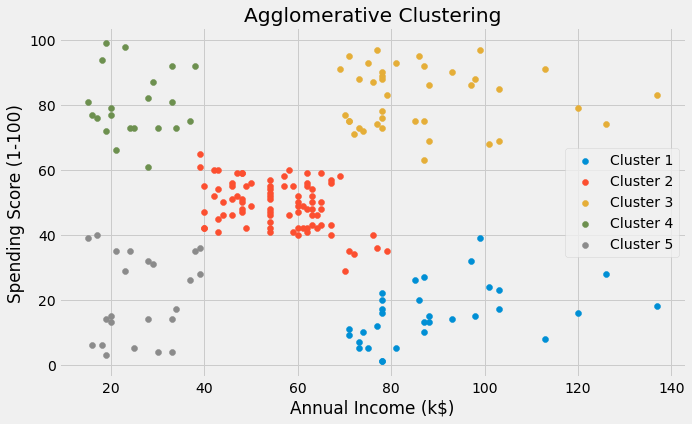

In [184]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

# Membaca data
df = pd.read_csv('./Mall_Customers.csv')

# Mengambil fitur yang akan digunakan
X = df.iloc[:, [3, 4]].values

# Menerapkan Agglomerative Clustering
# Jumlah cluster disesuaikan dengan hasil analisis dendrogram
# Anda dapat mengganti jumlah cluster sesuai kebutuhan
n_clusters = 5  # Ganti dengan jumlah cluster yang diinginkan
agglomerative = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
Y_hc = agglomerative.fit_predict(X)

# Menampilkan scatter plot dengan warna sesuai hasil clustering
plt.figure(figsize=(10, 6))
for i in range(n_clusters):
    plt.scatter(X[Y_hc == i, 0], X[Y_hc == i, 1], label=f'Cluster {i + 1}')

plt.title('Agglomerative Clustering')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()


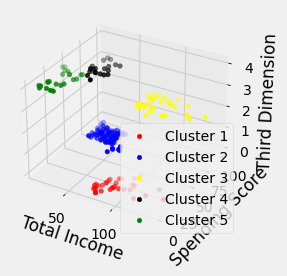

In [185]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Misalkan Y_hc adalah label cluster hasil dari algoritma hierarchical clustering
# Gantilah dengan variabel yang sesuai dalam kasus Anda

# Buat scatter plot tiga dimensi
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Definisikan warna untuk setiap cluster
colors = ['red', 'blue', 'yellow', 'black', 'green']

# Plot setiap cluster dengan warna yang berbeda
for i in range(5):  # Jumlah cluster (ganti sesuai dengan kebutuhan)
    ax.scatter(X[Y_hc==i, 0], X[Y_hc==i, 1], Y_hc[Y_hc==i], c=colors[i], label=f'Cluster {i+1}')

# Tambahkan label sumbu
ax.set_xlabel('Total Income')
ax.set_ylabel('Spending Score')
ax.set_zlabel('Third Dimension')  # Gantilah dengan nama yang sesuai

# Tampilkan legenda
ax.legend()

# Tampilkan plot
plt.show()


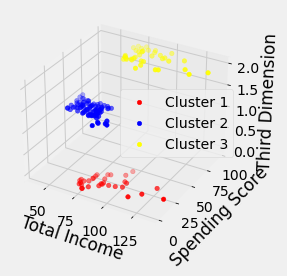

In [186]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Misalkan Y_hc adalah label cluster hasil dari algoritma hierarchical clustering
# Gantilah dengan variabel yang sesuai dalam kasus Anda

# Buat scatter plot tiga dimensi
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Definisikan warna untuk setiap cluster
colors = ['red', 'blue', 'yellow', 'black', 'green']

# Plot setiap cluster dengan warna yang berbeda
for i in range(3):  # Jumlah cluster (ganti sesuai dengan kebutuhan)
    ax.scatter(X[Y_hc==i, 0], X[Y_hc==i, 1], Y_hc[Y_hc==i], c=colors[i], label=f'Cluster {i+1}')

# Tambahkan label sumbu
ax.set_xlabel('Total Income')
ax.set_ylabel('Spending Score')
ax.set_zlabel('Third Dimension')  # Gantilah dengan nama yang sesuai

# Tampilkan legenda
ax.legend()

# Tampilkan plot
plt.show()


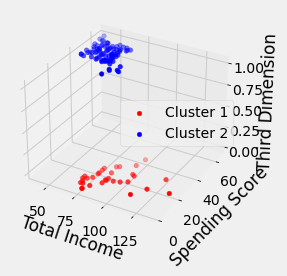

In [187]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Misalkan Y_hc adalah label cluster hasil dari algoritma hierarchical clustering
# Gantilah dengan variabel yang sesuai dalam kasus Anda

# Buat scatter plot tiga dimensi
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Definisikan warna untuk setiap cluster
colors = ['red', 'blue', 'yellow', 'black', 'green']

# Plot setiap cluster dengan warna yang berbeda
for i in range(2):  # Jumlah cluster (ganti sesuai dengan kebutuhan)
    ax.scatter(X[Y_hc==i, 0], X[Y_hc==i, 1], Y_hc[Y_hc==i], c=colors[i], label=f'Cluster {i+1}')

# Tambahkan label sumbu
ax.set_xlabel('Total Income')
ax.set_ylabel('Spending Score')
ax.set_zlabel('Third Dimension')  # Gantilah dengan nama yang sesuai

# Tampilkan legenda
ax.legend()

# Tampilkan plot
plt.show()


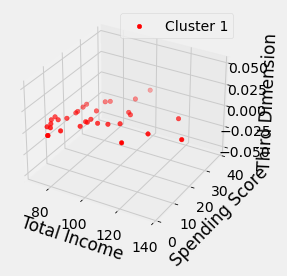

In [188]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Misalkan Y_hc adalah label cluster hasil dari algoritma hierarchical clustering
# Gantilah dengan variabel yang sesuai dalam kasus Anda

# Buat scatter plot tiga dimensi
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Definisikan warna untuk setiap cluster
colors = ['red', 'blue', 'yellow', 'black', 'green']

# Plot setiap cluster dengan warna yang berbeda
for i in range(1):  # Jumlah cluster (ganti sesuai dengan kebutuhan)
    ax.scatter(X[Y_hc==i, 0], X[Y_hc==i, 1], Y_hc[Y_hc==i], c=colors[i], label=f'Cluster {i+1}')

# Tambahkan label sumbu
ax.set_xlabel('Total Income')
ax.set_ylabel('Spending Score')
ax.set_zlabel('Third Dimension')  # Gantilah dengan nama yang sesuai

# Tampilkan legenda
ax.legend()

# Tampilkan plot
plt.show()


In [189]:
df['Taget'] = Y_hc
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Taget
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4
...,...,...,...,...,...,...
195,196,Female,35,120,79,2
196,197,Female,45,126,28,0
197,198,Male,32,126,74,2
198,199,Male,32,137,18,0


C:\Users\USER\AppData\Local\Temp\ipykernel_12492\3739989357.py:25: RuntimeWarning: Mean of empty slice.
  centroids = np.array([X[Y_hc == label].mean(axis=0) for label in range(5)])
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:181: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


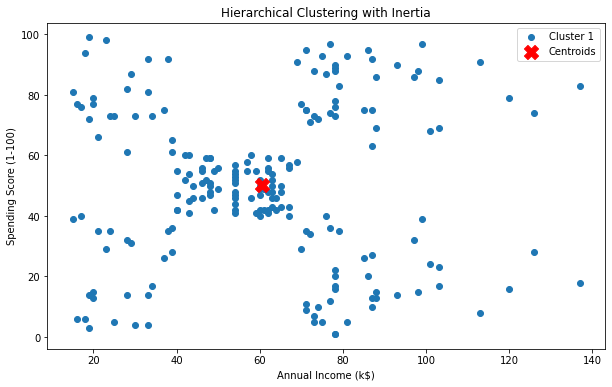

Inertia: 6223.912932356547


In [2]:
import numpy as np
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

# Baca dataset
df = pd.read_csv('./Mall_Customers.csv')

# Pilih fitur yang akan digunakan
X = df.iloc[:, [3, 4]].values

# Lakukan hierarchical clustering dengan metode agglomerative
agg_cluster = AgglomerativeClustering(n_clusters=1, affinity='euclidean', linkage='ward')
Y_hc = agg_cluster.fit_predict(X)

# Fungsi untuk menghitung inertia
def calculate_inertia(X, labels, centroids):
    distances = np.zeros(X.shape[0])
    for i, label in enumerate(labels):
        cluster_center = centroids[label]
        distances[i] = np.linalg.norm(X[i] - cluster_center)
    return np.sum(distances)

# Hitung inertia dan centroids
centroids = np.array([X[Y_hc == label].mean(axis=0) for label in range(5)])
inertia = calculate_inertia(X, Y_hc, centroids)

# Plot hasil clustering dan centroid
plt.figure(figsize=(10, 6))
for label in range(1):
    plt.scatter(X[Y_hc == label, 0], X[Y_hc == label, 1], label=f'Cluster {label + 1}')

plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=200, color='red', label='Centroids')
plt.title('Hierarchical Clustering with Inertia')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

print(f'Inertia: {inertia}')


In [198]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min

# Baca dataset
df = pd.read_csv('./Mall_Customers.csv')

# Pilih fitur yang akan digunakan
X = df.iloc[:, [3, 4]].values

# Metode clustering pertama
kmeans1 = KMeans(n_clusters=5, random_state=42)
Y_kmeans1 = kmeans1.fit_predict(X)
inertia1 = kmeans1.inertia_

# Metode clustering kedua
kmeans2 = KMeans(n_clusters=5, random_state=99)  # Ganti parameter atau metode clustering lain jika perlu
Y_kmeans2 = kmeans2.fit_predict(X)
inertia2 = kmeans2.inertia_

# Bandingkan nilai inertia
print(f'Inertia 1: {inertia1}')
print(f'Inertia 2: {inertia2}')

# Evaluasi perbandingan
if inertia1 < inertia2:
    print('Konfigurasi clustering pertama lebih baik.')
elif inertia1 > inertia2:
    print('Konfigurasi clustering kedua lebih baik.')
else:
    print('Kedua konfigurasi clustering memiliki nilai inertia yang sama.')


Inertia 1: 44448.45544793371
Inertia 2: 44448.45544793371
Kedua konfigurasi clustering memiliki nilai inertia yang sama.


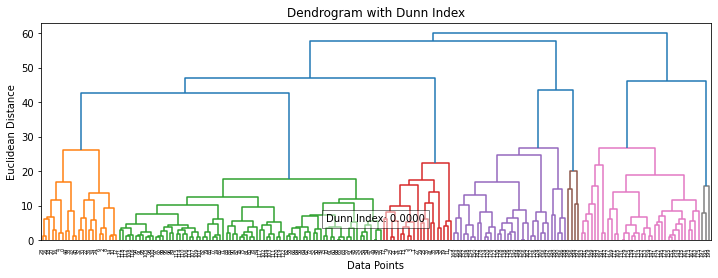

Dunn Index: 0.0000


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import pdist

# Membaca data
df = pd.read_csv('./Mall_Customers.csv')

# Mengambil fitur yang akan digunakan
X = df.iloc[:, [3, 4]].values

# Menerapkan Agglomerative Clustering dengan konfigurasi yang berbeda
agglomerative = AgglomerativeClustering(n_clusters=None, linkage='average', distance_threshold=10)
Y_hc = agglomerative.fit_predict(X)

# Menghitung pairwise distances antar objek
pairwise_distances_X = pdist(X)

# Menghitung pairwise distances antar cluster
linked = linkage(X, method='average')
pairwise_distances_cluster = linkage(X, method='average')

# Menghitung Dunn Index
min_distance_cluster = min(pairwise_distances_cluster[:, 2])
max_distance_object = max(pairwise_distances_X)

dunn_index = min_distance_cluster / max_distance_object

# Menampilkan dendrogram dengan informasi jarak
plt.figure(figsize=(12, 4))
dendrogram(linked,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=True)
plt.title('Dendrogram with Dunn Index')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distance')
plt.text(0.5, 0.1, f'Dunn Index: {dunn_index:.4f}', horizontalalignment='center', verticalalignment='center',
         transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.5))
plt.show()

print(f'Dunn Index: {dunn_index:.4f}')
